# Dev notebook

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import utils

### input parameter

In [2]:
yyyy = '2024'
mm = '09'
dd = '28'
station_id = '0-250-1001-07151-B'
path = f'../data/{yyyy}/{mm}/{dd}/AP_{station_id}-{yyyy}-{mm}-{dd}.nc'

### read file

In [3]:
vars = ['attenuated_backscatter_0']
ds = xr.open_dataset(path)[vars].load()

### SNR

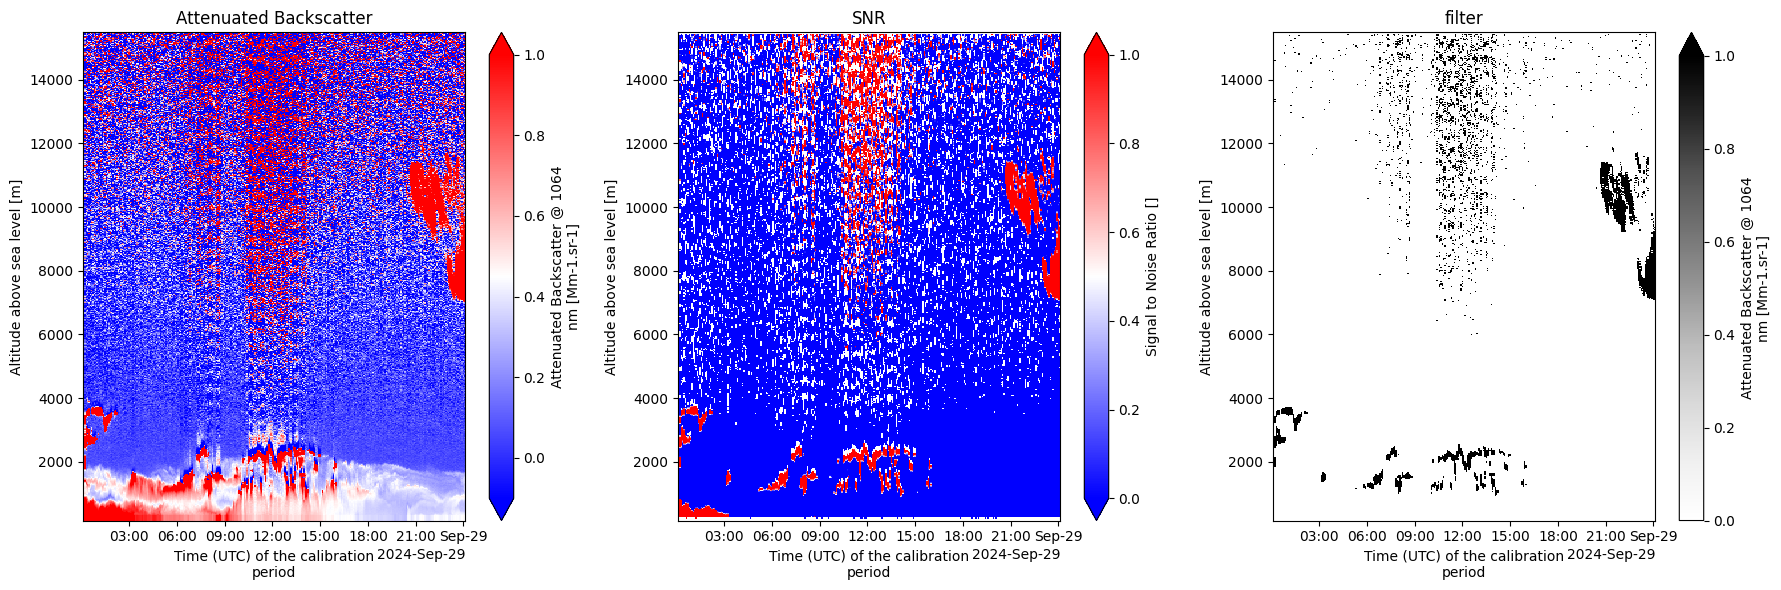

In [17]:
ds = utils.snr(ds, 'attenuated_backscatter_0', step=2, log=True)

thr_cloud = 1.5; thr_snr = 0.5
ds['filter'] = ds.where(ds.attenuated_backscatter_0>=thr_cloud).where(ds.snr>=thr_snr)['attenuated_backscatter_0']

left = {'variable': 'attenuated_backscatter_0', 'title': 'Attenuated Backscatter', 'vmin': -0.1, 'vmax': 1, 'cmap': 'bwr'}
middle = {'variable': 'snr','title': 'SNR','vmin': 0,'vmax': 1,'cmap': 'bwr'}
right = {'variable': 'filter','title': 'filter','vmin': 0,'vmax': 1,'cmap': 'Grays'}
utils.plot_pannel(ds, left, middle, right)

### gaussian filter + SNR

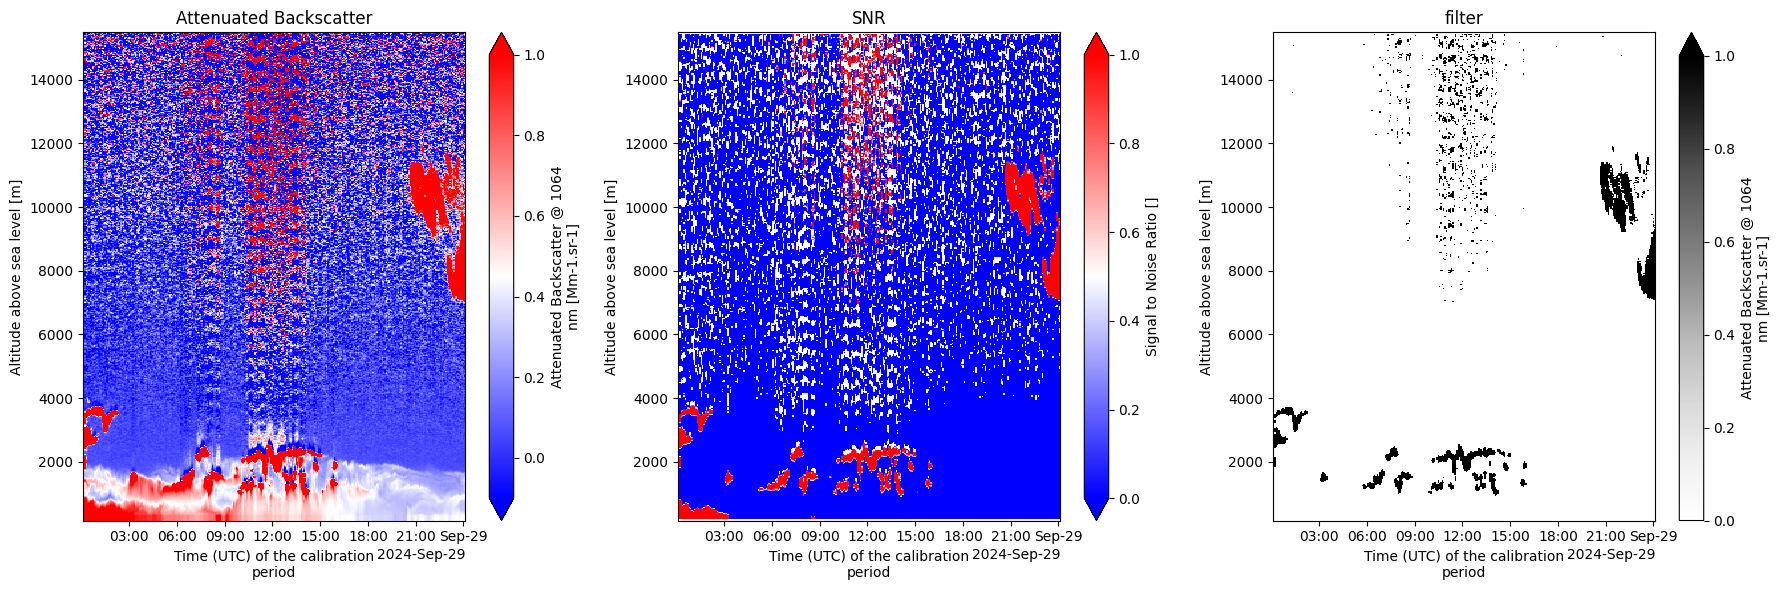

In [18]:
ds2 = ds
ds2 = utils.gaussian_filter(ds, sigma=0.5)
ds2 = utils.snr(ds2, 'attenuated_backscatter_0', step=2, log=True)

thr_cloud = 1.5; thr_snr = 0.5
ds2['filter'] = ds2['attenuated_backscatter_0'].where(ds2.attenuated_backscatter_0>=thr_cloud).where(ds2.snr>=thr_snr)

left = {'variable': 'attenuated_backscatter_0', 'title': 'Attenuated Backscatter', 'vmin': -0.1, 'vmax': 1, 'cmap': 'bwr'}
middle = {'variable': 'snr','title': 'SNR','vmin': 0,'vmax': 1,'cmap': 'bwr'}
right = {'variable': 'filter','title': 'filter','vmin': 0,'vmax': 1,'cmap': 'Grays'}
utils.plot_pannel(ds2, left, middle, right)

### TODO

threshold function that increases with altitude to remove high altitude noise